- По первой ДЗ с БД написать аналог на Pandas.
- Сравнить производительность с запросами к БД (pd.read_csv, pd.read_sql и без pandas).
- Результаты оформить в jupyter notebook.

In [1]:
import logging
import pandas as pd
import seaborn as sns
import sys
import time

from panfun import get_movie_by_genres, create_movie_df, get_movie_by_title

sys.path.append('../task_postgres')
from de_training_database import create_base
from get_movie_by_title import get_film
from get_movie_by_genre import get_by_genre

logger = logging.getLogger()
logger.disabled = True

In [2]:
title_query = 'lord rings'
genre_query = 'comedy, adventure'

pandas_deltas = []
postgres_deltas = []

In [3]:
%%timeit

pandas_start = time.time()
link = 'https://raw.githubusercontent.com/Godoy/imdb-5000-movie-dataset/master/data/movie_metadata.csv'
df = create_movie_df(link)
titles_found = get_movie_by_title(title_query, df)
genres_found = get_movie_by_genres(genre_query, df)
pandas_end = time.time()
pandas_delta = pandas_end - pandas_start
pandas_deltas.append(pandas_delta)


8.82 s ± 2.36 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit

postgres_start = time.time()
create_base()
titles_found = get_film(title_query)
genres_found = get_by_genre(genre_query)
postgres_end = time.time()
postgres_delta = postgres_end - postgres_start
postgres_deltas.append(postgres_delta)

15.3 s ± 5.24 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
labels = []
labels.extend(['pandas' for i in range(8)] + ['postgres' for i in range(8)])
deltas = []
deltas.extend(pandas_deltas + postgres_deltas)

compare_deltas = pd.DataFrame(list(zip(deltas, labels)), columns=['time', 'method'])

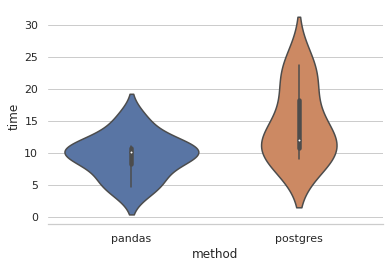

In [15]:
sns.set_theme(style="whitegrid")
sns.violinplot(data=compare_deltas, x='method', y='time', split=True)
sns.despine(left=True)